**Weather Analysis**

All statements are valid for the end of March 2018. During another time of a year significant changes may occur.
1. There is significantly more cities located in a Northern Hemisphere. Temperature vs Latitude plot shows a direct correlation between a distance from the equator with a temperature. The farther the city is located from the equator, the colder weather is there. Some outliers are possible on low latitudes - high mountains cities, where the temperatures are lower than the average for this latitude.
2. The correlation between Latitude and Humidity is not so obvious, but there is a trend that Humidity is 30% higher on the equator (from -20° S to 10° N). Also, the less humid regions can be found from 10° N to 50° N.
3. There is no dependence observed between Latitude and Cloudiness. There is a slight increase in wind speed as a distance from the equator increases. Also, it can be mentioned, that winds are insignificantly stronger in a Northern Hemisphere, probably because the inhabited territory is much larger.

In [1]:
import requests
import pandas as pd
import random
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from citipy import citipy
from pprint import pprint
from config import api_key

**Create a list of random cities**

# this code kills the kernel, what I did wrong?
cities = {}

def onemoreloop():
    return citylistcreator()

def citylistcreator():
    for x in range(500):
        coord = ((round(random.uniform(-90.00, 90.00),2)),(round(random.uniform(-180.00, 180.00),2)))
        citydata = citipy.nearest_city(*coord)
        city = citydata.city_name
        if city not in cities:
            cities[city] = coord
        else:
            try:
                return onemoreloop()
            except(RecursionError):
                return onemoreloop()

citylistcreator()
print(len(cities))

**This works fine, but the output number of cities is unpredictable**

In [2]:
cities = {}

for x in range(2000):
    coord = ((round(random.uniform(-90.00, 90.00),2)),(round(random.uniform(-180.00, 180.00),2)))
    citydata = citipy.nearest_city(*coord)
    city = citydata.city_name
    #if city not in cities: Not necessary, because of using dictionary
        #cities[city] = coord
    #else:
        #pass
    cities[city] = coord

print(len(cities))

772


**Retrieve cities data from openweathermap using Requests**

In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

all_requests_data = {}
counter = 1 # City number counter
absent_cities_req = 0 # Counter for the cities that are not in the openweather database

for city in cities:
    
    pure_city_name = city
    city = requests.utils.quote(city, safe='') # Make a city name readable (percent-encoded)
    ind_url = f'{url}appid={api_key}&units={units}&q={city}'
    # The line below is blocked, not to show the api_key
    #print(f'Now processing: city number {counter}, name {pure_city_name}\n{ind_url}')
    print(f'Now processing: city number {counter}, name {pure_city_name}')
    data_json = requests.get(ind_url).json()
    
    try:
        all_requests_data[data_json['name']] = [data_json['sys']['country'], data_json['coord']['lat'], 
                                              data_json['main']['temp'], data_json['main']['humidity'],
                                              data_json['clouds']['all'], data_json['wind']['speed'], data_json['dt']]
    except(KeyError):
        print(f'There is no city {pure_city_name} in openweathermap database')
        absent_cities_req +=1
        pass
    counter += 1
    
print(f'{absent_cities_req} cities were skipped')
print(f'{len(all_requests_data)} cities data was captured')

Now processing: city number 1, name mys shmidta
There is no city mys shmidta in openweathermap database
Now processing: city number 2, name butterworth
Now processing: city number 3, name furano
Now processing: city number 4, name provideniya
Now processing: city number 5, name ponta do sol
Now processing: city number 6, name sint-truiden
Now processing: city number 7, name ushuaia
Now processing: city number 8, name mataura
Now processing: city number 9, name new norfolk
Now processing: city number 10, name kapaa
Now processing: city number 11, name haines junction
Now processing: city number 12, name hirara
Now processing: city number 13, name manoel urbano
Now processing: city number 14, name hermanus
Now processing: city number 15, name avarua
Now processing: city number 16, name taolanaro
There is no city taolanaro in openweathermap database
Now processing: city number 17, name vulcanesti
Now processing: city number 18, name freeport
Now processing: city number 19, name verkhoyans

Now processing: city number 160, name rockland
Now processing: city number 161, name saldanha
Now processing: city number 162, name lovozero
Now processing: city number 163, name hilo
Now processing: city number 164, name skibbereen
Now processing: city number 165, name kahului
Now processing: city number 166, name hambantota
Now processing: city number 167, name lebu
Now processing: city number 168, name tabou
Now processing: city number 169, name paamiut
Now processing: city number 170, name ust-kuyga
Now processing: city number 171, name sao filipe
Now processing: city number 172, name cabedelo
Now processing: city number 173, name hofn
Now processing: city number 174, name shingu
Now processing: city number 175, name douentza
Now processing: city number 176, name mokrousovo
Now processing: city number 177, name praia da vitoria
Now processing: city number 178, name pisco
Now processing: city number 179, name qaanaaq
Now processing: city number 180, name hami
Now processing: city nu

Now processing: city number 315, name attawapiskat
There is no city attawapiskat in openweathermap database
Now processing: city number 316, name pucara
Now processing: city number 317, name flin flon
Now processing: city number 318, name bud
Now processing: city number 319, name vitim
Now processing: city number 320, name nabire
Now processing: city number 321, name arman
Now processing: city number 322, name paso blanco
Now processing: city number 323, name san cristobal
Now processing: city number 324, name guerrero negro
Now processing: city number 325, name arlit
Now processing: city number 326, name port macquarie
Now processing: city number 327, name vilhena
Now processing: city number 328, name inyonga
Now processing: city number 329, name marsabit
Now processing: city number 330, name hunza
There is no city hunza in openweathermap database
Now processing: city number 331, name vila velha
Now processing: city number 332, name jaunjelgava
Now processing: city number 333, name ag

Now processing: city number 473, name sinnamary
Now processing: city number 474, name fairbanks
Now processing: city number 475, name artyom
Now processing: city number 476, name chalus
Now processing: city number 477, name waipawa
Now processing: city number 478, name upata
Now processing: city number 479, name llanes
Now processing: city number 480, name mentougou
Now processing: city number 481, name houma
Now processing: city number 482, name townsville
Now processing: city number 483, name bay roberts
Now processing: city number 484, name noumea
Now processing: city number 485, name vao
Now processing: city number 486, name hohhot
Now processing: city number 487, name najran
Now processing: city number 488, name chesma
Now processing: city number 489, name manaus
Now processing: city number 490, name westport
Now processing: city number 491, name dhidhdhoo
Now processing: city number 492, name camargo
Now processing: city number 493, name betioky
There is no city betioky in openwe

Now processing: city number 635, name abu zabad
Now processing: city number 636, name ahtopol
Now processing: city number 637, name pedasi
Now processing: city number 638, name mount isa
Now processing: city number 639, name verkh-suetka
Now processing: city number 640, name jalu
Now processing: city number 641, name joensuu
Now processing: city number 642, name sartell
Now processing: city number 643, name dubbo
Now processing: city number 644, name pereslavl-zalesskiy
Now processing: city number 645, name xiaoyi
Now processing: city number 646, name sao miguel do araguaia
Now processing: city number 647, name acari
Now processing: city number 648, name tecoanapa
Now processing: city number 649, name lipin bor
Now processing: city number 650, name solnechnyy
Now processing: city number 651, name nizhneyansk
There is no city nizhneyansk in openweathermap database
Now processing: city number 652, name hualmay
Now processing: city number 653, name kumphawapi
Now processing: city number 6

**Create a DataFrame based on Requests data**

In [11]:
dframe_json = pd.DataFrame(all_requests_data)
final_req_df = dframe_json.transpose()
final_req_df.columns = ['Country', 'Latitude', 'Temperature(F)', 'Humidity(%)', 'Cloudiness(%)', 'Wind Speed(MpH)',
                        'Date']
final_req_df.to_csv('Weather_requests.csv')
print(final_req_df.count())
final_req_df.head()

Country            698
Latitude           698
Temperature(F)     698
Humidity(%)        698
Cloudiness(%)      698
Wind Speed(MpH)    698
Date               698
dtype: int64


,Country,Latitude,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(MpH),Date
Aasiaat,GL,68.71,3.69,100,44,6.64,1522179860
Abalak,NE,15.46,80.1,20,8,13.24,1522179821
Abha,SA,18.22,64.4,82,0,3.36,1522177200
Abu Zabad,SD,12.35,73.57,47,0,4.97,1522180002
Acapulco,MX,16.86,82.4,65,40,12.75,1522176180


**Retrieve cities data from openweathermap using openweathermapy**

**Here and below I use metric system because Farenheits sound like Sanskrit for me**

In [5]:
settings = {"units": "metric", "appid": api_key} 

In [6]:
import urllib

all_owm_data = []
absent_cities_owm = 0

for city in cities:
    try:
        all_owm_data.append(owm.get_current(city, **settings))
    except urllib.error.HTTPError:
        print(f'There is no city {city} in openweathermap database')
        absent_cities_owm += 1
        pass
        
print(f'{absent_cities_owm} cities were skipped')
print(f'{len(all_owm_data)} cities data was captured')

There is no city mys shmidta in openweathermap database
There is no city taolanaro in openweathermap database
There is no city akyab in openweathermap database
There is no city barentsburg in openweathermap database
There is no city illoqqortoormiut in openweathermap database
There is no city sentyabrskiy in openweathermap database
There is no city skagastrond in openweathermap database
There is no city berbera in openweathermap database
There is no city palabuhanratu in openweathermap database
There is no city grand river south east in openweathermap database
There is no city tsihombe in openweathermap database
There is no city rawannawi in openweathermap database
There is no city tabialan in openweathermap database
There is no city wau in openweathermap database
There is no city cockburn harbour in openweathermap database
There is no city belushya guba in openweathermap database
There is no city marcona in openweathermap database
There is no city samusu in openweathermap database
The

**Create a DataFrame based on OWM data**

In [12]:
search = ['name', 'sys.country', 'coord.lat', 'main.temp','main.humidity', 'clouds.all', 'wind.speed', 'dt']
extracted_data = [city(*search) for city in all_owm_data]

final_owm_df = pd.DataFrame(extracted_data)
final_owm_df.columns = ['Name','Country', 'Latitude', 'Temperature(C)', 'Humidity(%)', 'Cloudiness(%)',
                        'Wind Speed(MpH)', 'Date']
final_owm_df.to_csv('Weather_owm.csv')
print(final_owm_df.count())
final_owm_df.head()

Name               698
Country            698
Latitude           698
Temperature(C)     698
Humidity(%)        698
Cloudiness(%)      698
Wind Speed(MpH)    698
Date               698
dtype: int64


,Name,Country,Latitude,Temperature(C),Humidity(%),Cloudiness(%),Wind Speed(MpH),Date
0,Butterworth,MY,5.40,26.51,88,75,2.60,1522177200
1,Furano,JP,43.28,0.72,75,32,2.07,1522180048
2,Provideniya,RU,64.42,-5.26,100,76,1.77,1522179986
3,Ponta do Sol,BR,-20.63,24.52,53,8,1.72,1522179813
4,Sint-Truiden,BE,50.82,7.11,100,88,2.10,1522178700


**Temperature vs Latitude Plot**

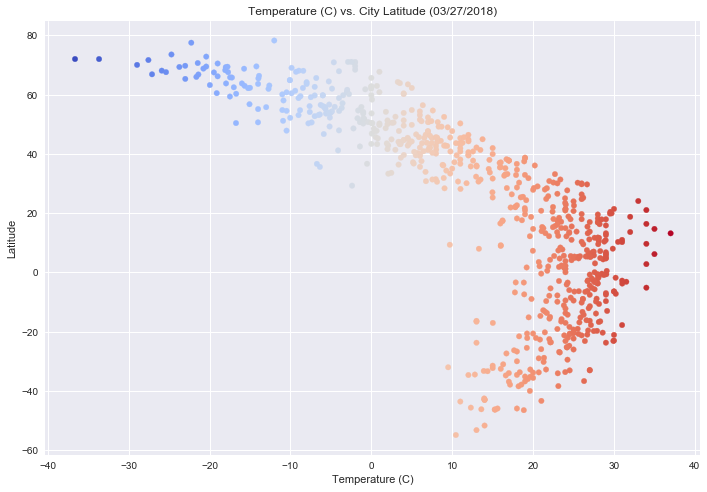

In [8]:
sns.set()
basedf = final_owm_df # DataFrame source for all plots can be easilly changed
current_date = datetime.datetime.now().date().strftime("%m/%d/%Y")
plt.figure(figsize=(10,7))
plt.scatter(basedf['Temperature(C)'], basedf['Latitude'], c=basedf['Temperature(C)'], s=30, cmap='coolwarm')
plt.ylabel('Latitude')
plt.xlabel('Temperature (C)')
plt.title(f'Temperature (C) vs. City Latitude ({current_date})')
plt.tight_layout()

**Latitude vs Humidity, Cloudiness and Wind Speed Plots**

Text(0.5,1,'City Latitude vs City Wind Speed (03/27/2018)')

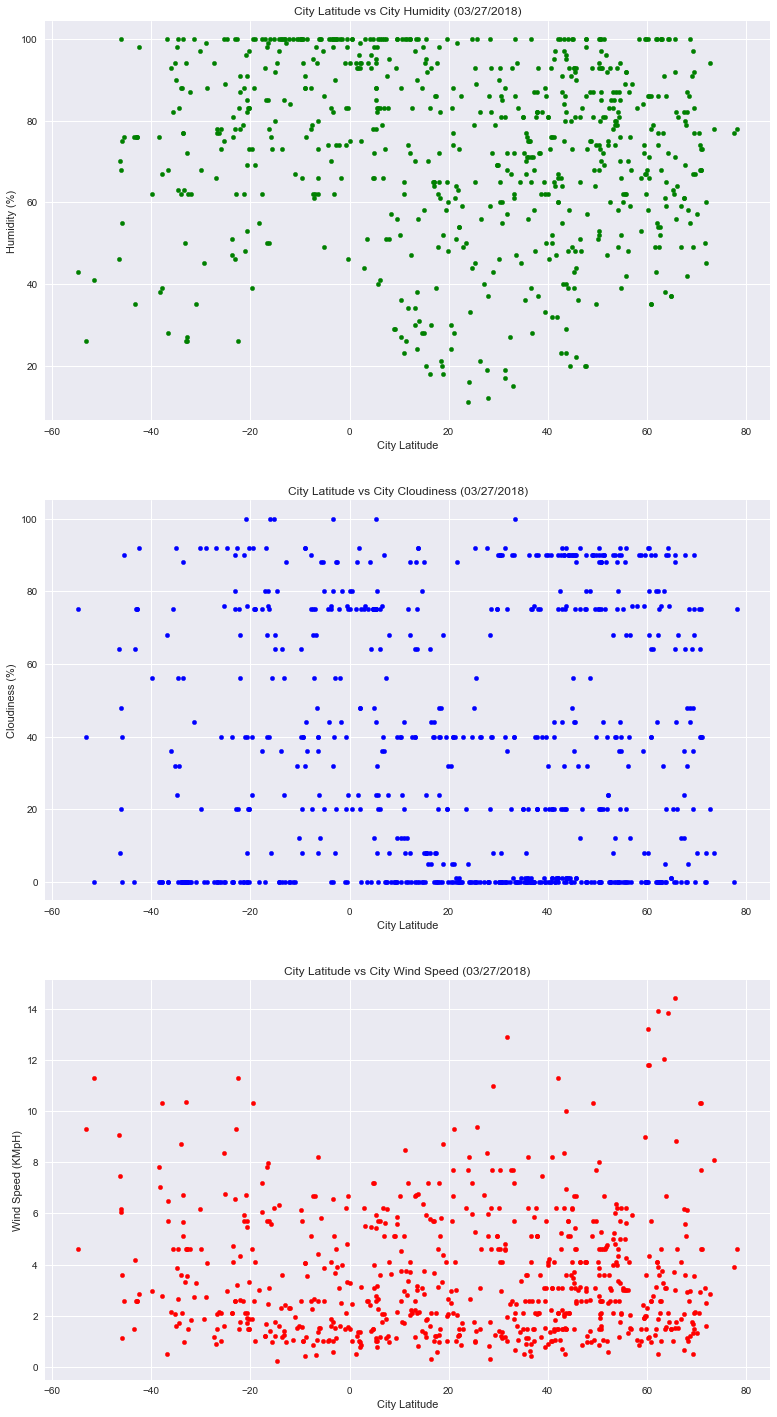

In [9]:
sns.set()
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=False)
#ax1.set_xlim(min(df_weather['Latitude'])-16, max(df_weather['Latitude'])+20)
fig.set_size_inches(13,25)

ax1.scatter(basedf['Latitude'], basedf['Humidity(%)'], c='g', s=20)
ax1.set_xlabel('City Latitude')
ax1.set_ylabel('Humidity (%)')
ax1.set_title(f'City Latitude vs City Humidity ({current_date})')

ax2.scatter(basedf['Latitude'], basedf['Cloudiness(%)'], c='b', s=20)
ax2.set_xlabel('City Latitude')
ax2.set_ylabel('Cloudiness (%)')
ax2.set_title(f'City Latitude vs City Cloudiness ({current_date})')

ax3.scatter(basedf['Latitude'], basedf['Wind Speed(MpH)'], c='r', s=20)
ax3.set_xlabel('City Latitude')
ax3.set_ylabel('Wind Speed (KMpH)')
ax3.set_title(f'City Latitude vs City Wind Speed ({current_date})')